# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [166]:
#city_data = { }
# data we need for dataframe in the next steps based on api order
lats = []
longs = []
temp_maxes = []
humidities = []
dates = []
wind_speeds = []
cloudiness = []
countries = []
city_data = []
temp_units = "imperial"
#i = 0
# keep a track of count
city_count_curr = 0
set_count = 1
for city in cities:
    target_url = ("http://api.openweathermap.org/data/2.5/weather?q={0}&appid={1}&units={2}").format(city, weather_api_key, 
                                                                                                     temp_units)
    #city_data[i] = requests.get(target_url).json() 
    #print("Processing City: "+str(i)+"| City Name: "+city)
    #i +=1
    try:
        response = requests.get(target_url).json() 
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        temp_maxes.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        dates.append(response['dt'])
        wind_speeds.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        if city_count_curr > 48:
            city_count_curr = 1
            set_count += 1
            city_data.append(city)
        else:
            city_count_curr += 1
            city_data.append(city)
        print(f"Processing Record {city_count_curr} of Set {set_count} | {city}")
    except Exception:
        print(f"City not found. Skipping...")
print("------------------------------\n")
print("Data Retrieval Complete\n")
print("------------------------------\n")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | qandala
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bosaso
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | the valley
City not found. Skipping...
City not found. Skipping...
Processing Record 12 of Set 1 | caravelas
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | tateyama
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kuching
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | taoudenni
City not found. Skipping...


Processing Record 44 of Set 4 | shizilu
Processing Record 45 of Set 4 | harper
Processing Record 46 of Set 4 | gold coast
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | karabuk
Processing Record 49 of Set 4 | los llanos de aridane
Processing Record 1 of Set 5 | mahon
Processing Record 2 of Set 5 | kamenka
Processing Record 3 of Set 5 | ambulu
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | san felipe
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | jibuti
Processing Record 8 of Set 5 | tumpat
Processing Record 9 of Set 5 | le mars
Processing Record 10 of Set 5 | fuyu
Processing Record 11 of Set 5 | paita
Processing Record 12 of Set 5 | la palma
Processing Record 13 of Set 5 | vila velha
Processing Record 14 of Set 5 | saint-augustin
Processing Record 15 of Set 5 | pevek
Processing Record 16 of Set 5 | hobyo
Processing Record 17 of Set 5 | chimbarongo
City not found. Skipping...
Processing Record 18 of Set 5 | 

Processing Record 33 of Set 8 | kavaratti
Processing Record 34 of Set 8 | caranguejeira
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | sloboda
Processing Record 37 of Set 8 | brzesko
Processing Record 38 of Set 8 | america dourada
Processing Record 39 of Set 8 | airai
Processing Record 40 of Set 8 | rio cuarto
Processing Record 41 of Set 8 | caranavi
Processing Record 42 of Set 8 | ossora
Processing Record 43 of Set 8 | sebina
Processing Record 44 of Set 8 | antalaha
Processing Record 45 of Set 8 | magadan
Processing Record 46 of Set 8 | payakumbuh
Processing Record 47 of Set 8 | rock sound
Processing Record 48 of Set 8 | shaowu
Processing Record 49 of Set 8 | sitka
Processing Record 1 of Set 9 | rumoi
Processing Record 2 of Set 9 | calvinia
Processing Record 3 of Set 9 | springfield
Processing Record 4 of Set 9 | komsomolskiy
City not found. Skipping...
Processing Record 5 of Set 9 | ouesso
Processing Record 6 of Set 9 | mound
Processing Record 7 of Set 9 | h

Processing Record 27 of Set 12 | trapani
City not found. Skipping...
Processing Record 28 of Set 12 | gimli
Processing Record 29 of Set 12 | sorland
Processing Record 30 of Set 12 | wadena
Processing Record 31 of Set 12 | griffith
Processing Record 32 of Set 12 | boende
Processing Record 33 of Set 12 | talcahuano
Processing Record 34 of Set 12 | vao
Processing Record 35 of Set 12 | spornoye
Processing Record 36 of Set 12 | port-cartier
Processing Record 37 of Set 12 | antofagasta
Processing Record 38 of Set 12 | nantucket
Processing Record 39 of Set 12 | guarapari
Processing Record 40 of Set 12 | sechura
Processing Record 41 of Set 12 | luanda
Processing Record 42 of Set 12 | mikhaylovka
Processing Record 43 of Set 12 | ugoofaaru
Processing Record 44 of Set 12 | jalu
Processing Record 45 of Set 12 | chicama
Processing Record 46 of Set 12 | makakilo city
City not found. Skipping...
Processing Record 47 of Set 12 | coos bay
Processing Record 48 of Set 12 | bintulu
Processing Record 49 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [167]:
# Create a dict of the lists
weather_dict = {
    "City":city_data,
    "Lat":lats,
    "Lng":longs,
    "Max Temp":temp_maxes,
    "Humidity":humidities,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates
}

# Build and display dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df = weather_df.dropna()
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,73,40,13.87,CL,1603790526
1,qandala,11.47,49.87,83.57,40,0,7.67,SO,1603790798
2,tasiilaq,65.61,-37.64,32.00,90,100,17.22,GL,1603790798
3,bredasdorp,-34.53,20.04,75.20,57,40,9.17,ZA,1603790798
4,puerto ayora,-0.74,-90.35,66.99,94,92,1.99,EC,1603790798


In [168]:
# Export data to csv
weather_df.to_csv(output_data_file)

# statistical information for weather_df
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,19.949356,16.065695,59.820644,71.216949,51.511864,8.023746,1.603791e+09
std,32.738054,90.109049,23.141032,23.077717,40.110023,5.575780,5.818230e+01
min,-54.800000,-179.170000,-5.800000,1.000000,0.000000,0.090000,1.603791e+09
25%,-6.205000,-65.085000,45.000000,60.000000,2.250000,3.740000,1.603791e+09
50%,26.330000,20.420000,65.085000,78.000000,55.500000,6.930000,1.603791e+09
75%,47.685000,92.145000,79.652500,88.000000,90.000000,10.527500,1.603791e+09
max,78.220000,179.320000,103.980000,100.000000,100.000000,41.380000,1.603791e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [169]:
weather_df_humid_mod = weather_df.query('Humidity < 100')
weather_df_humid_mod.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.552596,18.307561,60.067825,70.207018,50.729825,8.092456,1.603791e+09
std,32.877540,89.875441,23.354670,22.828911,40.226782,5.612907,5.862535e+01
min,-54.800000,-179.170000,-5.800000,1.000000,0.000000,0.090000,1.603791e+09
25%,-7.325000,-60.447500,45.250000,60.000000,2.000000,3.785000,1.603791e+09
50%,25.095000,21.665000,66.000000,76.000000,51.000000,6.930000,1.603791e+09
75%,47.500000,94.505000,80.005000,88.000000,90.000000,10.762500,1.603791e+09
max,78.220000,179.320000,103.980000,99.000000,100.000000,41.380000,1.603791e+09


In [170]:
#  Get the indices of cities that have humidity over 100%.
# Just did a query to remove all the humidity less than 100

In [171]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [172]:
weather_df_humid_mod.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.15,-70.92,39.20,73,40,13.87,CL,1603790526
1,qandala,11.47,49.87,83.57,40,0,7.67,SO,1603790798
2,tasiilaq,65.61,-37.64,32.00,90,100,17.22,GL,1603790798
3,bredasdorp,-34.53,20.04,75.20,57,40,9.17,ZA,1603790798
4,puerto ayora,-0.74,-90.35,66.99,94,92,1.99,EC,1603790798


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

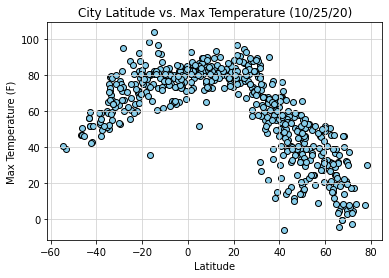

In [176]:
# Lat vs Max Temp
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Max Temp"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig1.png")


## Latitude vs. Humidity Plot

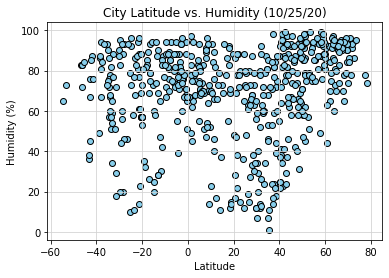

In [177]:
# Lat vs Humidity
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Humidity"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig2.png")


## Latitude vs. Cloudiness Plot

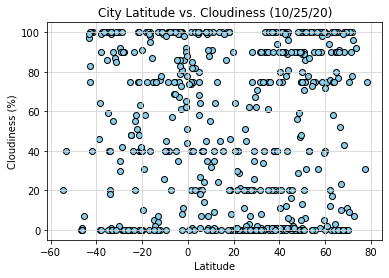

In [178]:
# Lat vs Cloudiness
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Cloudiness"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig3.png")


## Latitude vs. Wind Speed Plot

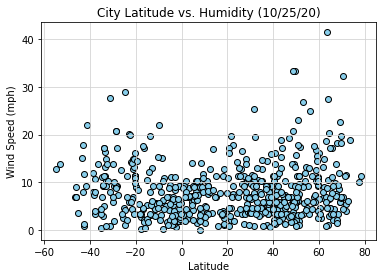

In [179]:
# Lat vs Wind Speed
plt.scatter(weather_df_humid_mod["Lat"], weather_df_humid_mod["Wind Speed"], edgecolors="black", facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/25/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")
plt.savefig("../output_data/Fig4.png")

## Linear Regression

In [181]:
# We need northern hemisphere and souther hemisphere
north_hemis_df = weather_df_humid_mod.loc[pd.to_numeric(weather_df_humid_mod["Lat"]).astype(float) > 0, :]
south_hemis_df = weather_df_humid_mod.loc[pd.to_numeric(weather_df_humid_mod["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line eq is: y = -1.06x + 95.33
The r value is: -0.8419363643341292
The regression plot has a nature of decreasing as well as its r value is negative so its a negative correlation.
So that means in the northern hemisphere as you move away from the equator the temperature will decrease.


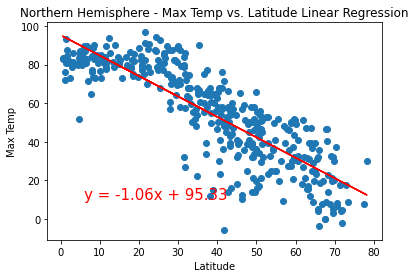

In [192]:
# North hemisphere plot
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot has a nature of decreasing as well as its r value is negative so its a negative correlation.")
print("So that means in the northern hemisphere as you move away from the equator the temperature will decrease.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression line eq is: y = 0.61x + 84.08
The r value is: 0.6556413399652153
The regression plot has a nature of increasing as well as its r value is posiitve so its a positive correlation.
So that means in the northern hemisphere as you get close to the equator the temperature will increase.


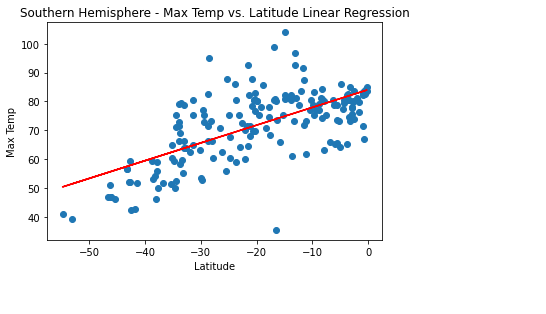

In [215]:
# Now for the south hemisphere
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot has a nature of increasing as well as its r value is posiitve so its a positive correlation.")
print("So that means in the northern hemisphere as you get close to the equator the temperature will increase.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.37x + 55.76
The r value is: 0.31089851810743824
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


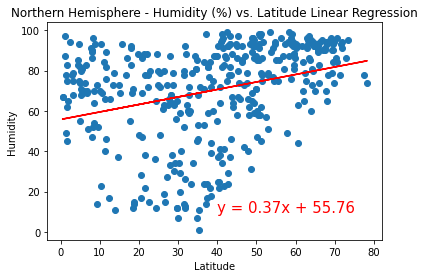

In [211]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.17x + 74.14
The r value is: 0.11502796069865405
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


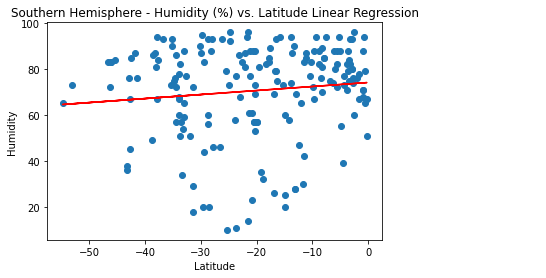

In [212]:
# Now for the South hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.32x + 35.59
The r value is: 0.1570453606695381
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


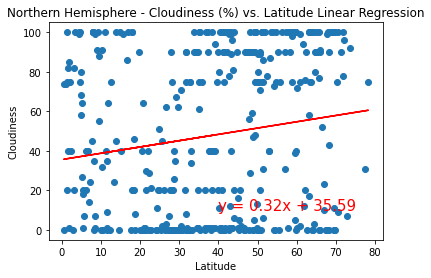

In [213]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression line eq is: y = 0.56x + 68.27
The r value is: 0.19435314755249233
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


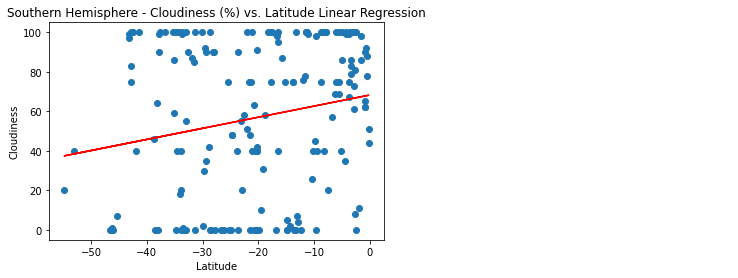

In [217]:
# Now for the South hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line eq is: y = 0.05x + 6.03
The r value is: 0.192608117094379
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a positive correlation.


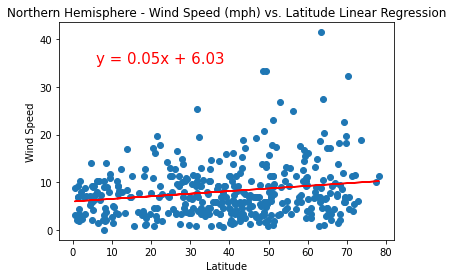

In [227]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(north_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(north_hemis_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a positive correlation.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression line eq is: y = -0.12x + 5.52
The r value is: -0.3015403129800952
The regression plot does show a little bit of an increase but not enough to make a solid conclusion.
So that means there isn't much of a correlation in this data set but if there is its a negative correlation.


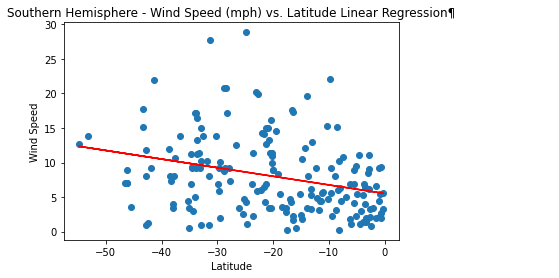

In [228]:
# Now for the North hemisphere humidity
x_val = pd.to_numeric(south_hemis_df["Lat"]).astype(float)
y_val = pd.to_numeric(south_hemis_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The regression line eq is: {line_eq}")
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (6,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression¶")
print(f"The r value is: {rvalue}")
print("The regression plot does show a little bit of an increase but not enough to make a solid conclusion.")
print("So that means there isn't much of a correlation in this data set but if there is its a negative correlation.")
plt.show()